<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Проверка простых статистических гипотез. Оценка действительных значений вероятностей ошибок 1 и 2 рода


Цели и задачи л/р:
1. выполнить массовое статистическое моделирование, направленное на изучение поведения статистики проверки простых статистических гипотез
2. экспериментальное исследование поведения вероятностей ошибок 1 и 2 рода.


1. Сгенерировать N = 10^3 выборок размером n (для всех значений n = 10, 50, 100, 150, 200, 500) из следующих распределений:
1. нормального с нулевым математическим ожиданием и единичной дисперсией
2. равномерного на интервале [−√3, √3],
3. экспоненциального с параметром распределения  = 1, из всех значений которого вычтена единица.

Обратите внимание, что все данные распределения имеют нулевое математическое ожидание и единичное значение дисперсии.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [62]:
sample_sizes = [10, 50, 100, 150, 200, 500]  # Размерность выборок
N = 10 ** 3  # Число выборок
alpha = 0.05 # Уровень значимости
z_critical = norm.ppf(1 - alpha / 2) # z-статистика
print(f'Z-critical: {z_critical}')

Z-critical: 1.959963984540054


In [63]:
"""НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ"""
"""РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ"""
"""ЭКСПОНЕНТА"""

samples = {
    "normal_distribution": {
        values: [] for values in sample_sizes
    },
    "uniform_distribution": {
        values: [] for values in sample_sizes
    },
    "exponential_distribution": {
        values: [] for values in sample_sizes
    }
}

for value in sample_sizes:
    samples["normal_distribution"][value] = [np.random.normal(0, 1, value) for _ in range(N)]
    samples["uniform_distribution"][value] = [np.random.uniform(-np.sqrt(3), np.sqrt(3), value) for _ in range(N)]
    samples["exponential_distribution"][value] = [np.random.exponential(1, value) - 1 for _ in range(N)]

In [64]:
print(samples.items)

<built-in method items of dict object at 0x7f80bf40ffc0>


2. Для каждой выборки проверить гипотезу о равенстве математического ожидания нулю. Величину критического значения назначьте, исходя из заданного значения уровня значимости  = 0,05. Считать дисперсию генеральной совокупности известной и равной единице.

In [65]:
for distribution, distribution_samples in samples.items():
  print(f"\nРаспределение: {distribution}")
  for values, sample_list in distribution_samples.items():
    rejections_counter = 0
    for sample in sample_list:
      sample_mean = np.mean(sample)
      z_value = np.abs(sample_mean) / (1 / np.sqrt(values))
      if (abs(z_value) > z_critical):
        """Отвергаем нулевую гипотезу и увеличиваем счетчик отклоненных гипотез"""
        rejections_counter += 1
    rejections_rate = rejections_counter / N * 100
    print(f"\tРазмер выборки: {values}, Отклоненных гипотез: {rejections_counter} из {N} ({rejections_rate:.2f}%)")


Распределение: normal_distribution
	Размер выборки: 10, Отклоненных гипотез: 59 из 1000 (5.90%)
	Размер выборки: 50, Отклоненных гипотез: 50 из 1000 (5.00%)
	Размер выборки: 100, Отклоненных гипотез: 51 из 1000 (5.10%)
	Размер выборки: 150, Отклоненных гипотез: 56 из 1000 (5.60%)
	Размер выборки: 200, Отклоненных гипотез: 56 из 1000 (5.60%)
	Размер выборки: 500, Отклоненных гипотез: 49 из 1000 (4.90%)

Распределение: uniform_distribution
	Размер выборки: 10, Отклоненных гипотез: 42 из 1000 (4.20%)
	Размер выборки: 50, Отклоненных гипотез: 47 из 1000 (4.70%)
	Размер выборки: 100, Отклоненных гипотез: 47 из 1000 (4.70%)
	Размер выборки: 150, Отклоненных гипотез: 48 из 1000 (4.80%)
	Размер выборки: 200, Отклоненных гипотез: 61 из 1000 (6.10%)
	Размер выборки: 500, Отклоненных гипотез: 55 из 1000 (5.50%)

Распределение: exponential_distribution
	Размер выборки: 10, Отклоненных гипотез: 47 из 1000 (4.70%)
	Размер выборки: 50, Отклоненных гипотез: 44 из 1000 (4.40%)
	Размер выборки: 100, От

3. Исследовать, совпадает ли назначенное значение уровня значимости ( = 0,05) с реально достигаемым *. Для этого для каждого значения размера выборки n подсчитать, в каком количестве из испытанных выборок было принято решение об отклонении нулевой гипотезы. Построить график зависимости * от размера выборки (n). Наложить на каждое значение * границы доверительного интервала для данной вероятности, чтобы понять, попадает ли точное значение  в их пределы или нет.

In [66]:
for value in sample_sizes:
    samples["normal_distribution"][value] = [np.random.normal(0, 1, value) for _ in range(N)]
    samples["uniform_distribution"][value] = [np.random.uniform(-np.sqrt(3), np.sqrt(3), value) for _ in range(N)]
    samples["exponential_distribution"][value] = [np.random.exponential(1, value) - 1 for _ in range(N)]


confidence_intervals = {
    values: [] for values in sample_sizes
}

alpha_star_results = {
    values: [] for values in sample_sizes
}


for distribution, distribution_samples in samples.items():
      print(f"\nРаспределение: {distribution}")
      alpha_stars = []
      lower_bounds = []
      upper_bounds = []

      for values, sample_list in distribution_samples.items():
        rejections_counter = 0
        for sample in sample_list:
          sample_mean = np.mean(sample)
          z_value = np.abs(sample_mean) / (1 / np.sqrt(values))
          if (abs(z_value) > z_critical):
             """Отвергаем нулевую гипотезу и увеличиваем счетчик отклоненных гипотез"""
             rejections_counter += 1

        alpha_star = rejections_counter / N  # Уровень значимости реально достигаемый
        alpha_stars.append(alpha_star)
        confidence_interval_half = z_critical * np.sqrt(alpha_star * (1 - alpha_star) / N) # Полуширина дов интервала
        lower_bounds.append(alpha_star - confidence_interval_half) # Нижняя граница
        upper_bounds.append(alpha_star + confidence_interval_half) # Верхняя граница

        print(f"\tn = {n}, α* = {alpha_star:.4f}, Доверительный интервал: "
              f"\t[{alpha_star - confidence_interval_half:.4f}, {alpha_star + confidence_interval_half:.4f}]")

      alpha_star_results = alpha_stars
      confidence_intervals[distribution] = (lower_bounds, upper_bounds)




Распределение: normal_distribution
	n = 10000, α* = 0.0520, Доверительный интервал: 	[0.0382, 0.0658]
	n = 10000, α* = 0.0480, Доверительный интервал: 	[0.0348, 0.0612]
	n = 10000, α* = 0.0590, Доверительный интервал: 	[0.0444, 0.0736]
	n = 10000, α* = 0.0450, Доверительный интервал: 	[0.0322, 0.0578]
	n = 10000, α* = 0.0520, Доверительный интервал: 	[0.0382, 0.0658]
	n = 10000, α* = 0.0530, Доверительный интервал: 	[0.0391, 0.0669]

Распределение: uniform_distribution
	n = 10000, α* = 0.0410, Доверительный интервал: 	[0.0287, 0.0533]
	n = 10000, α* = 0.0560, Доверительный интервал: 	[0.0417, 0.0703]
	n = 10000, α* = 0.0650, Доверительный интервал: 	[0.0497, 0.0803]
	n = 10000, α* = 0.0410, Доверительный интервал: 	[0.0287, 0.0533]
	n = 10000, α* = 0.0520, Доверительный интервал: 	[0.0382, 0.0658]
	n = 10000, α* = 0.0440, Доверительный интервал: 	[0.0313, 0.0567]

Распределение: exponential_distribution
	n = 10000, α* = 0.0490, Доверительный интервал: 	[0.0356, 0.0624]
	n = 10000, α* 


Распределение: normal_distribution
	n = 10, α* = 0.0510, Доверительный интервал: 	[0.0374, 0.0646]
	n = 50, α* = 0.0340, Доверительный интервал: 	[0.0228, 0.0452]
	n = 100, α* = 0.0480, Доверительный интервал: 	[0.0348, 0.0612]
	n = 150, α* = 0.0470, Доверительный интервал: 	[0.0339, 0.0601]
	n = 200, α* = 0.0590, Доверительный интервал: 	[0.0444, 0.0736]
	n = 500, α* = 0.0360, Доверительный интервал: 	[0.0245, 0.0475]


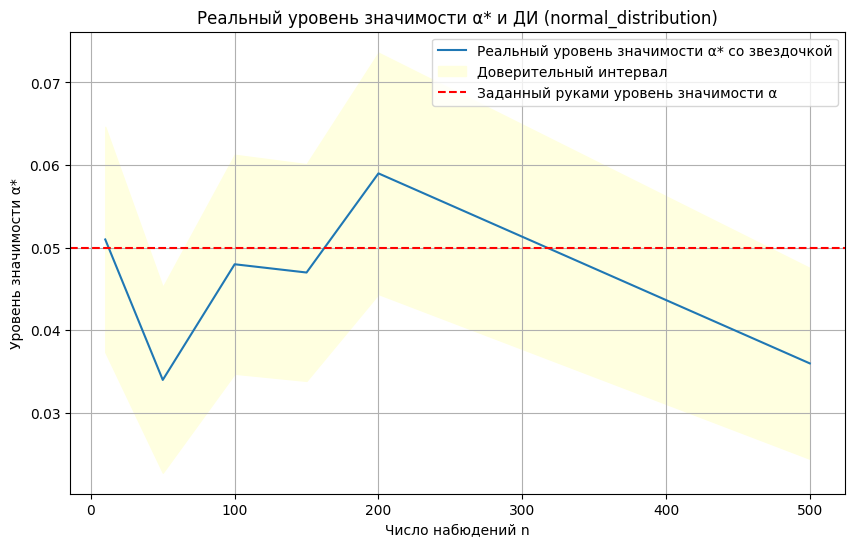


Распределение: uniform_distribution
	n = 10, α* = 0.0600, Доверительный интервал: 	[0.0453, 0.0747]
	n = 50, α* = 0.0570, Доверительный интервал: 	[0.0426, 0.0714]
	n = 100, α* = 0.0440, Доверительный интервал: 	[0.0313, 0.0567]
	n = 150, α* = 0.0540, Доверительный интервал: 	[0.0400, 0.0680]
	n = 200, α* = 0.0420, Доверительный интервал: 	[0.0296, 0.0544]
	n = 500, α* = 0.0500, Доверительный интервал: 	[0.0365, 0.0635]


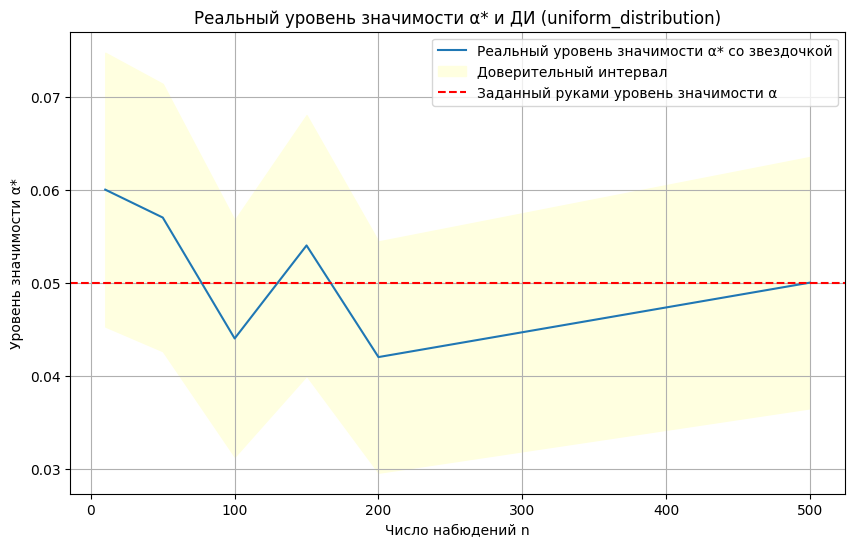


Распределение: exponential_distribution
	n = 10, α* = 0.0540, Доверительный интервал: 	[0.0400, 0.0680]
	n = 50, α* = 0.0500, Доверительный интервал: 	[0.0365, 0.0635]
	n = 100, α* = 0.0470, Доверительный интервал: 	[0.0339, 0.0601]
	n = 150, α* = 0.0500, Доверительный интервал: 	[0.0365, 0.0635]
	n = 200, α* = 0.0480, Доверительный интервал: 	[0.0348, 0.0612]
	n = 500, α* = 0.0430, Доверительный интервал: 	[0.0304, 0.0556]


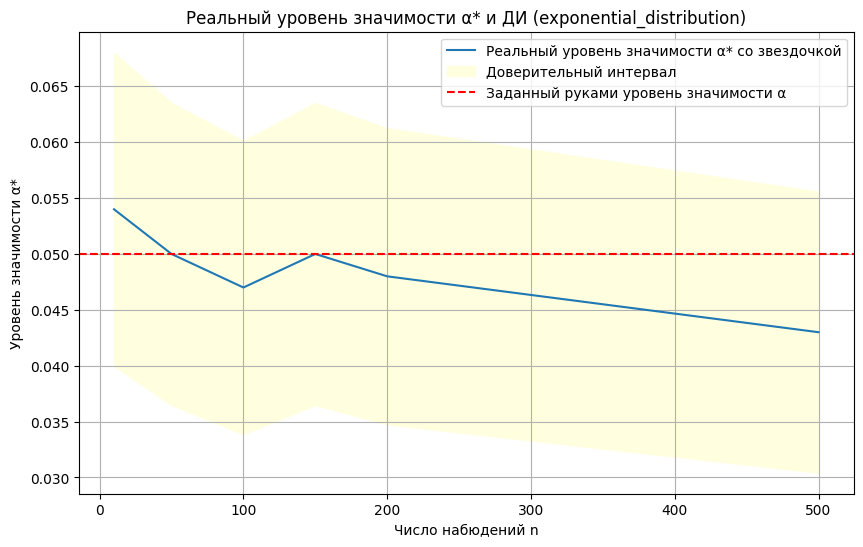

In [68]:
for n in sample_sizes:
    samples["normal_distribution"][n] = [np.random.normal(0, 1, n) for _ in range(N)]
    samples["uniform_distribution"][n] = [np.random.uniform(-np.sqrt(3), np.sqrt(3), n) for _ in range(N)]
    samples["exponential_distribution"][n] = [np.random.exponential(1, n) - 1 for _ in range(N)]

confidence_intervals = {
    values: [] for values in sample_sizes
}

alpha_star_results = {
    values: [] for values in sample_sizes
}

for dist_name, dist_samples in samples.items():
    print(f"\nРаспределение: {dist_name}")
    alpha_stars = []
    lower_bounds = []
    upper_bounds = []

    for n, sample_list in dist_samples.items():
        rejections_counter = 0
        for sample in sample_list:
            sample_mean = np.mean(sample)
            z_stat = sample_mean / (1 / np.sqrt(n))

            if abs(z_stat) > z_critical:
                rejections_counter += 1

        alpha_star = rejections_counter / N # Уровень значимости реально достигаемый
        alpha_stars.append(alpha_star)
        confidence_interval_half = z_critical * np.sqrt(alpha_star * (1 - alpha_star) / N) # Полуширина дов интервала
        lower_bounds.append(alpha_star - confidence_interval_half) # Нижняя граница
        upper_bounds.append(alpha_star + confidence_interval_half) # Верхняя граница

        print(f"\tn = {n}, α* = {alpha_star:.4f}, Доверительный интервал: "
              f"\t[{alpha_star - confidence_interval_half:.4f}, {alpha_star + confidence_interval_half:.4f}]")

    alpha_star_results = alpha_stars
    confidence_intervals[dist_name] = (lower_bounds, upper_bounds)

    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, alpha_stars, label="Реальный уровень значимости α* со звездочкой")
    plt.fill_between(
        sample_sizes,
        lower_bounds,
        upper_bounds,
        color='lightyellow',
        label="Доверительный интервал"
    )
    plt.axhline(alpha, color='red', linestyle='--', label="Заданный руками уровень значимости α")
    plt.title(f"Реальный уровень значимости α* и ДИ ({dist_name})")
    plt.xlabel("Число набюдений n")
    plt.ylabel("Уровень значимости α*")
    plt.legend()
    plt.grid(True)
    plt.show()

4. Изучить, как будет изменяться зависимость из п.3, если действительное математическое ожидание генеральной совокупности будет в действительности отличаться от нуля на величину 0,1; 0,2; ... 1,0. Построить соответствующие графики.

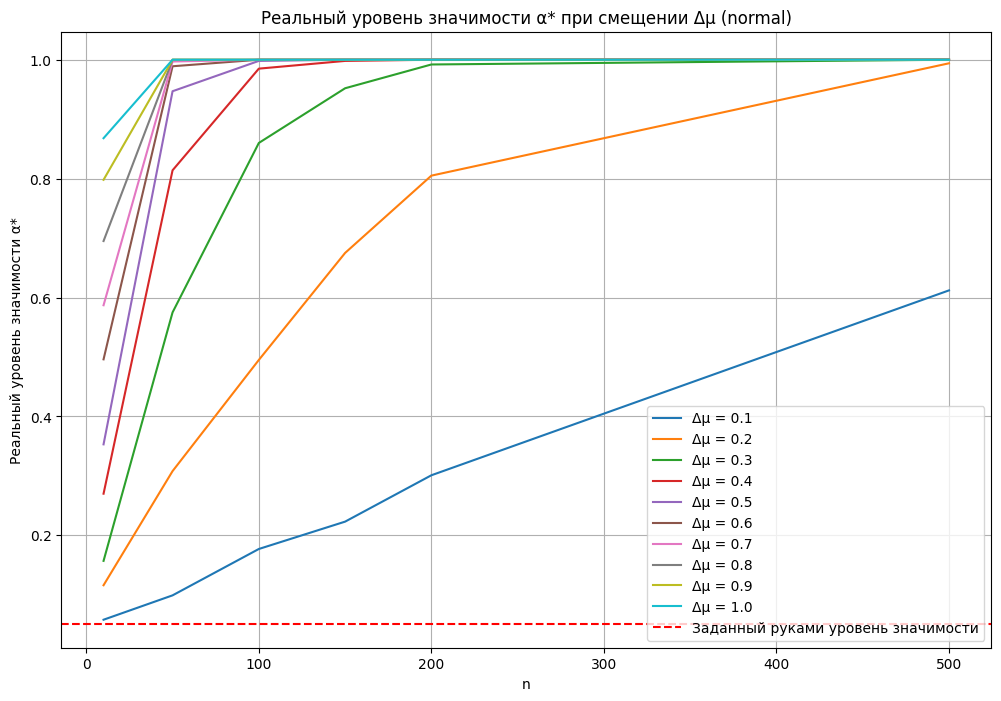

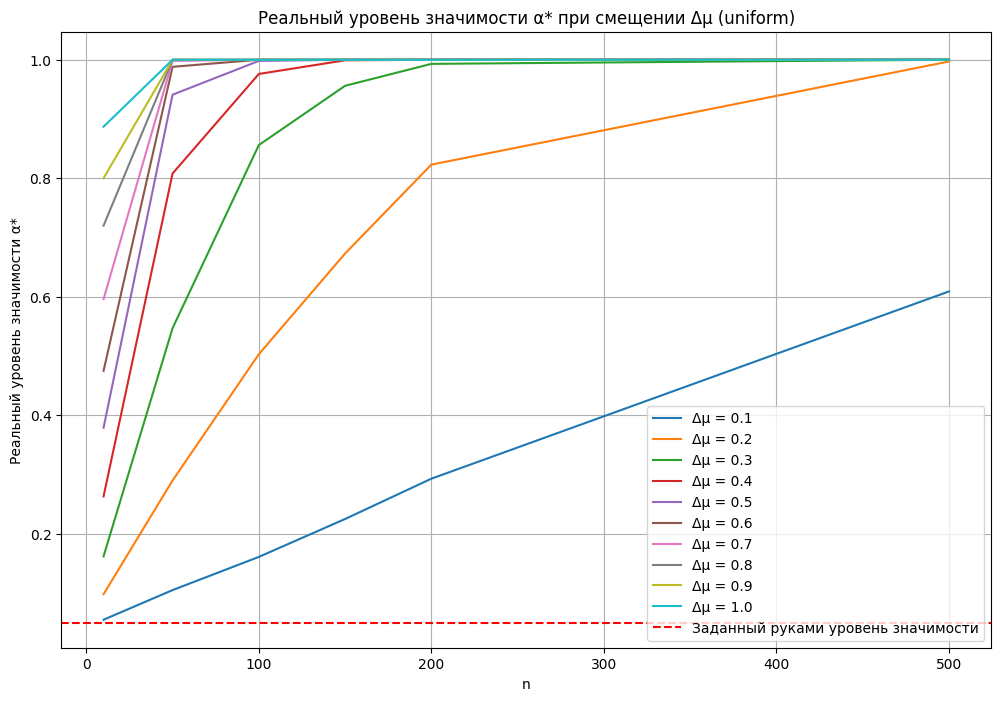

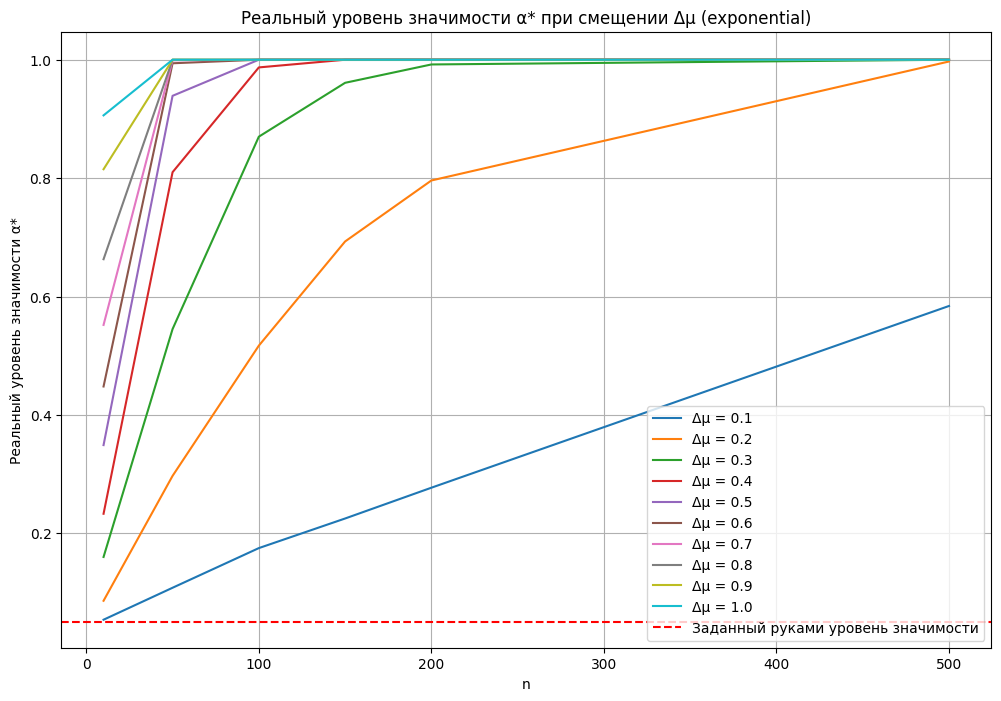

In [78]:
delta_mu_values = np.arange(0.1, 1.1, 0.1)

def compute_alpha_star(mu, sample_sizes, N, dist_type="normal"):
    alpha_star_results = []

    for n in sample_sizes:
        rejections = 0
        for _ in range(N):
            if dist_type == "normal":
                sample = np.random.normal(mu, 1, n)
            elif dist_type == "uniform":
                sample = np.random.uniform(-np.sqrt(3) + mu, np.sqrt(3) + mu, n)
            elif dist_type == "exponential":
                sample = np.random.exponential(1, n) - 1 + mu

            sample_mean = np.mean(sample)
            z_stat = sample_mean / (1 / np.sqrt(n))

            if abs(z_stat) > z_critical:
                rejections += 1
        alpha_star_results.append(rejections / N)

    return alpha_star_results

for dist_name in ["normal", "uniform", "exponential"]:
    plt.figure(figsize=(12, 8))
    for delta_mu in delta_mu_values:
        alpha_stars = compute_alpha_star(delta_mu, sample_sizes, N, dist_type=dist_name)
        plt.plot(sample_sizes, alpha_stars, label=f"Δμ = {delta_mu:.1f}")
    plt.axhline(alpha, color='red', linestyle='--', label="Заданный руками уровень значимости")
    plt.title(f"Реальный уровень значимости α* при смещении Δμ ({dist_name})")
    plt.xlabel("n")
    plt.ylabel("Реальный уровень значимости α*")
    plt.legend()
    plt.grid(True)
    plt.show()